In [31]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image
from IPython.display import display

def read_jsonfile(json_file):
    with open(json_file) as json_file:
        json_data = json.load(json_file)
    return json_data

# 데이터 불러오기

In [32]:
path = './sample_dataset_1/'
bestshots = path + 'bestshots.json'
itemsets = path + 'itemsets.json'
category_info = 'sample_dataset_2/category_infos.json'
products_meta = 'sample_dataset_2/products_meta.json'

bestshots_json = read_jsonfile(bestshots)
itemsets_json = read_jsonfile(itemsets)
category_json = read_jsonfile(category_info)
products_json = read_jsonfile(products_meta)

category_ent1 = category_json['421B6D0E746C4E6D']
category_ent2 = category_json['B57D4F97C0E44A11']

bestshots_df = pd.read_json(bestshots)
itemsets_df = pd.read_json(itemsets)
category_en1_df = pd.DataFrame(category_ent1)
category_en2_df = pd.DataFrame(category_ent2)

In [33]:
itemsets_df.rename(columns={'enterpriseId':'enterprise_id', '_id':'id'}, inplace=True)
templates_df = pd.merge(bestshots_df, itemsets_df, on=['enterprise_id', 'projectId', 'id'])

ent2, ent1 = templates_df['enterprise_id'].unique().tolist()
ent1, ent2

('421B6D0E746C4E6D', 'B57D4F97C0E44A11')

### 스타일 별 아이템 목록 뽑기

In [34]:
def get_productId(items_list):
    new_list = []
    for item in items_list:
        new_list.append(item['productId'])
    return new_list

templates_df['items'] = templates_df['items'].apply(get_productId)

### 아이템 별 Top3 상위 스타일 뽑기

In [35]:
templates_df['top3_style'] = templates_df['style_predictions'].apply(lambda x: sorted([(name, score) for name, score in x.items()], key=lambda x: x[1], reverse=True)[:3])
templates_df['top3_style'] = templates_df['top3_style'].apply(lambda x: [name for name, score in x])

In [36]:
templates_df[['awesome_score', 'enterprise_id','items', 'top3_style', 'top_style', 'projectId']]

awesome_score     enterprise_id  \
0        0.996600  B57D4F97C0E44A11   
1        0.996008  B57D4F97C0E44A11   
2        0.995962  421B6D0E746C4E6D   
3        0.995537  B57D4F97C0E44A11   
4        0.995019  421B6D0E746C4E6D   
..            ...               ...   
91       0.971838  B57D4F97C0E44A11   
92       0.971593  B57D4F97C0E44A11   
93       0.971409  B57D4F97C0E44A11   
94       0.971278  B57D4F97C0E44A11   
95       0.971237  B57D4F97C0E44A11   

                                                items  \
0   [XXQODtk64AA2BC4BBE54FE6, XdhSsO0816AF21BBE9E4...   
1   [Xr78ibh6534B86500774C6F, XnWHmUB56BB0A7139B14...   
2   [X8brWeE6E8B43372F554FBC, X8bqVqW1FE8A93C42C14...   
3   [XX5gsD_A5E5F6B99A7B4DBB, XiG5Ajx8AF2879DD1054...   
4   [XoeB4_83FAEB81F0E364501, X6ZGM3j4A9B48A633DC4...   
..                                                ...   
91  [XfI7YQg8C1B6256738E4611, XYHqnoZ5E8D8E0235874...   
92  [XjDwfVdAF22EC90C17E41FC, XvJwdIRCA3E68A6895C4...   
93  [0381E1DE68C34DA7, XxzI_Yw1E906F3E4FC948CA, Xz...   
94  [9685F6318BD040E1, 034406C6064644E4, Xr78ibiD1...   
95  [XOaJWUT013866EB8251439C, XxzI_YKA15B6BA7F5494...   

                                     top3_style     top_style  \
0               [MODERN, MINIMAL, SCANDINAVIAN]        MODERN   
1        [NATURAL, MODERN, CLASSIC_AND_ANTIQUE]       NATURAL   
2   [SCANDINAVIAN, NATURAL, MID_CENTURY_MODERN]  SCANDINAVIAN   
3               [MODERN, SCANDINAVIAN, NATURAL]        MODERN   
4               [NATURAL, SCANDINAVIAN, MODERN]       NATURAL   
..                                          ...           ...   
91                   [NATURAL, LUXURY, MINIMAL]       NATURAL   
92        [MODERN, NATURAL, MID_CENTURY_MODERN]        MODERN   
93                    [MODERN, NATURAL, LUXURY]        MODERN   
94                   [MODERN, MINIMAL, NATURAL]        MODERN   
95              [NATURAL, SCANDINAVIAN, MODERN]       NATURAL   

                  projectId  
0   X8j99sp49E05B453ACF48AD  
1   X8W_69HBB9C8BD301A94CD9  
2   X7hL3kEA3D67804817E43F6  
3   X8nOJBP70A4670CF22F4BF6  
4   X8p_jfR0B4C680157DA430F  
..                      ...  
91  X9BKMz6F4650C88C9C24E48  
92  X8vZSLj052A7675D40E4EB4  
93  X8qEw1LA7EFF3CE415545A5  
94  Xxie9vD3C123617746E47FA  
95  X8l3PVwAE3FDA3419D145D9  

[96 rows x 6 columns]

In [37]:
items_stack = pd.DataFrame(templates_df['items'].apply(lambda x: pd.Series(x)).stack()).reset_index(1, drop=True)
items_stack

0
0   XXQODtk64AA2BC4BBE54FE6
0   XdhSsO0816AF21BBE9E4C25
0   XQKaHpw04D70BFBEB6F42EA
0          3100C835A1044D48
0          6E3531E25BF343BE
..                      ...
95  X1-HzCWC247E032E6754C6D
95  XkM8W9WDCCA3D3B46F3411A
95         6D721D1847F34015
95  XVUjXut5309C6E2F1704D0B
95  Xz-wAD-29DE9DB6CFC84E92

[1377 rows x 1 columns]

In [38]:
products_df = pd.merge(templates_df[['enterprise_id', 'top3_style', 'top_style', 'projectId', 'awesome_score']].reset_index(), items_stack.reset_index(), on='index').drop(['index'], axis=1).rename(columns = {0:'product_id'})
products_df

enterprise_id                       top3_style top_style  \
0     B57D4F97C0E44A11  [MODERN, MINIMAL, SCANDINAVIAN]    MODERN   
1     B57D4F97C0E44A11  [MODERN, MINIMAL, SCANDINAVIAN]    MODERN   
2     B57D4F97C0E44A11  [MODERN, MINIMAL, SCANDINAVIAN]    MODERN   
3     B57D4F97C0E44A11  [MODERN, MINIMAL, SCANDINAVIAN]    MODERN   
4     B57D4F97C0E44A11  [MODERN, MINIMAL, SCANDINAVIAN]    MODERN   
...                ...                              ...       ...   
1372  B57D4F97C0E44A11  [NATURAL, SCANDINAVIAN, MODERN]   NATURAL   
1373  B57D4F97C0E44A11  [NATURAL, SCANDINAVIAN, MODERN]   NATURAL   
1374  B57D4F97C0E44A11  [NATURAL, SCANDINAVIAN, MODERN]   NATURAL   
1375  B57D4F97C0E44A11  [NATURAL, SCANDINAVIAN, MODERN]   NATURAL   
1376  B57D4F97C0E44A11  [NATURAL, SCANDINAVIAN, MODERN]   NATURAL   

                    projectId  awesome_score               product_id  
0     X8j99sp49E05B453ACF48AD       0.996600  XXQODtk64AA2BC4BBE54FE6  
1     X8j99sp49E05B453ACF48AD       0.996600  XdhSsO0816AF21BBE9E4C25  
2     X8j99sp49E05B453ACF48AD       0.996600  XQKaHpw04D70BFBEB6F42EA  
3     X8j99sp49E05B453ACF48AD       0.996600         3100C835A1044D48  
4     X8j99sp49E05B453ACF48AD       0.996600         6E3531E25BF343BE  
...                       ...            ...                      ...  
1372  X8l3PVwAE3FDA3419D145D9       0.971237  X1-HzCWC247E032E6754C6D  
1373  X8l3PVwAE3FDA3419D145D9       0.971237  XkM8W9WDCCA3D3B46F3411A  
1374  X8l3PVwAE3FDA3419D145D9       0.971237         6D721D1847F34015  
1375  X8l3PVwAE3FDA3419D145D9       0.971237  XVUjXut5309C6E2F1704D0B  
1376  X8l3PVwAE3FDA3419D145D9       0.971237  Xz-wAD-29DE9DB6CFC84E92  

[1377 rows x 6 columns]

### 아이템 별 태그 정보 병합하기

In [39]:
prod_tags_df = pd.DataFrame(products_json).T.reset_index(drop=True)[['_id', 'tags', 'name', 'images']]
prod_tags_df.head()

_id                                               tags  \
0  X5rPclT9CFB7E73DEA8495A                                                 []   
1  Xo7kQN3DC7A5B7C9FE746D6                     [헤이홈, hejhome, 조명, 라인등, 라인LED]   
2  XtxfYC1EF0F9090248B4518                      [데이드리머, daydreamer, 러그, 사각러그]   
3  XSWNaDQ8D34AB5317CA4971              [애플, Apple, 맥북, 노트북, 사무용, 사뭉제품, 가전제품]   
4  XT21RHb69DF906D42DF4284  [생활, 생활용품, 휴지통/분리수거함, 휴지통, 분리수거, 분리수거함, 쓰레기통, ...   

                  name                                             images  
0                4F_TV  [https://resources.archisketch.com/product/X5r...  
1  스마트 라인 LED (화이트)_on  [https://resources.archisketch.com/product/Xo7...  
2     브로 사계절 인테리어 러그 S  [https://resources.archisketch.com/product/Xtx...  
3             맥북프로 13형  [https://resources.archisketch.com/product/XSW...  
4  원터치 와이드 화이트 휴지통 10L  [https://resources.archisketch.com/product/XT2...

In [40]:
products_df = pd.merge(products_df, prod_tags_df, left_on='product_id', right_on='_id').drop(['_id'], axis=1)
products_df = pd.merge(products_df, products_df['product_id'].value_counts().reset_index(), left_on='product_id', right_on='index').rename(columns = {'product_id_x': 'product_id','product_id_y':'use_count'}).drop(['index'], axis=1)
products_df

enterprise_id                       top3_style top_style  \
0     B57D4F97C0E44A11  [MODERN, MINIMAL, SCANDINAVIAN]    MODERN   
1     B57D4F97C0E44A11  [MODERN, MINIMAL, SCANDINAVIAN]    MODERN   
2     B57D4F97C0E44A11  [MODERN, MINIMAL, SCANDINAVIAN]    MODERN   
3     B57D4F97C0E44A11  [MODERN, MINIMAL, SCANDINAVIAN]    MODERN   
4     B57D4F97C0E44A11  [MODERN, MINIMAL, SCANDINAVIAN]    MODERN   
...                ...                              ...       ...   
1372  B57D4F97C0E44A11  [NATURAL, SCANDINAVIAN, MODERN]   NATURAL   
1373  B57D4F97C0E44A11  [NATURAL, SCANDINAVIAN, MODERN]   NATURAL   
1374  B57D4F97C0E44A11  [NATURAL, SCANDINAVIAN, MODERN]   NATURAL   
1375  B57D4F97C0E44A11  [NATURAL, SCANDINAVIAN, MODERN]   NATURAL   
1376  B57D4F97C0E44A11  [NATURAL, SCANDINAVIAN, MODERN]   NATURAL   

                    projectId  awesome_score               product_id  \
0     X8j99sp49E05B453ACF48AD       0.996600  XXQODtk64AA2BC4BBE54FE6   
1     X8j99sp49E05B453ACF48AD       0.996600  XdhSsO0816AF21BBE9E4C25   
2     X8j99sp49E05B453ACF48AD       0.996600  XQKaHpw04D70BFBEB6F42EA   
3     X8j99sp49E05B453ACF48AD       0.996600         3100C835A1044D48   
4     X8j99sp49E05B453ACF48AD       0.996600         6E3531E25BF343BE   
...                       ...            ...                      ...   
1372  X8l3PVwAE3FDA3419D145D9       0.971237         F41D77A7B85645BB   
1373  X8l3PVwAE3FDA3419D145D9       0.971237  XpB8ovXAD1DAF31931F4224   
1374  X8l3PVwAE3FDA3419D145D9       0.971237  XVFHdrDE3B85E8F0BDF4E50   
1375  X8l3PVwAE3FDA3419D145D9       0.971237         6D721D1847F34015   
1376  X8l3PVwAE3FDA3419D145D9       0.971237  XVUjXut5309C6E2F1704D0B   

                                                   tags  \
0              [계절가전, 가습기, 가습, 화이트, 흰색, 초음파식, 초음파, EMK]   
1     [소파, 쇼파, 1인용소파, 1인소파, 1인쇼파, 1인, 1인용, 1인용쇼파, 화이...   
2     [TV, 티비, 티브이, 텔레비전, 테레비, 블랙, 검정, 검은, 검은색, LED,...   
3                       [러그, 한일카페트, 터치미, 극세사, 원형, 아이보리]   
4                                                    []   
...                                                 ...   
1372                                                 []   
1373  [거울, 미러, 벽거울, 벽, 골드, 금색, 벽걸이형, 벽걸이, 벽걸이거울, 벽걸이...   
1374                                                 []   
1375                             [반려동물, 고양이, 반려묘, 브리스캣]   
1376                              [반려동물, 고양이, 반려묘, 딩동펫]   

                               name  \
0     자동습도조절 스마트 초음파 가습기 EK-H3C40WH   
1      마카롱 패브릭 1인용소파 5colors (아이보리)   
2          43인치 스마트TV PTI43UL (스탠드)   
3                터치미 극세사 원형 러그 아이보리   
4             투명 식물 액자 - 몬스테라 A3사이즈   
...                             ...   
1372                     레트로 플라워 커튼   
1373           뉴플로렌스 골드 스탠딩 거울 (골드)   
1374      특대형 아레카야자 이태리 토분 (화이트브라운)   
1375            O형 원목 캣타워 기본형 (그레이)   
1376        반려동물 고양이 스탠드 선인장 스크래쳐 M   

                                                 images  use_count  
0     [https://resources.archisketch.com/product/XXQ...          1  
1     [https://resources.archisketch.com/product/Xdh...          1  
2     [https://resources.archisketch.com/product/XQK...          1  
3     [https://resources.archisketch.com/product/310...          1  
4     [https://resources.archisketch.com/product/6E3...          1  
...                                                 ...        ...  
1372  [https://resources.archisketch.com/product/F41...          1  
1373  [https://resources.archisketch.com/product/XpB...          1  
1374  [https://resources.archisketch.com/product/XVF...          1  
1375  [https://resources.archisketch.com/product/6D7...          1  
1376  [https://resources.archisketch.com/product/XVU...          1  

[1377 rows x 10 columns]

In [41]:
# enterprise_id 별로 분류하기

products_df_4 = products_df[products_df['enterprise_id'] == ent1].reset_index(drop=True)
products_df_b = products_df[products_df['enterprise_id'] == ent2].reset_index(drop=True)
products_df_4.shape, products_df_b.shape

((188, 10), (1189, 10))

In [42]:
matrix_4 = products_df_4.pivot_table('awesome_score', index='projectId', columns='name').fillna(0).round().astype(int)
matrix_b = products_df_b.pivot_table('awesome_score', index='projectId', columns='name').fillna(0).round().astype(int)

matrix_4.shape, matrix_b.shape

((15, 172), (81, 867))

In [43]:
matrix_4

name                     06.앙리마티스 드로잉 6  2f, 3f 원기둥  3F 나무박스  3f 테라스 난간  \
projectId                                                                 
X7So0fA789921C07F554CF0               0           0        0          0   
X7hL3kEA3D67804817E43F6               0           0        0          0   
X8-WZTe5BD1B46E18354B2F               0           0        0          0   
X8_LjIOD57E8F04AC494CD2               0           0        0          0   
X8aJqid89D0B81EEE784526               0           0        0          0   
X8hTk8vA40CE650486343FE               0           0        0          0   
X8iP8JP35147435C1874BE5               0           0        0          0   
X8icoJA4184D43C82754202               0           1        0          0   
X8lAaUz9AFE21C607014D32               0           0        0          0   
X8leUtv16A82EFBBF284125               0           0        0          0   
X8lxCwVE40C012658D14CAF               0           0        0          0   
X8m7ez_BFB4553F87B64100               0           0        1          1   
X8p_jfR0B4C680157DA430F               1           0        0          0   
X8setNf6A59EEE7DE5F4939               0           0        0          0   
X9EXepN70398E918713402D               0           0        0          0   

name                     3층_조명_1 (조명 on )  3층_조명_14 (조명 on )  \
projectId                                                      
X7So0fA789921C07F554CF0                 0                  0   
X7hL3kEA3D67804817E43F6                 0                  0   
X8-WZTe5BD1B46E18354B2F                 0                  0   
X8_LjIOD57E8F04AC494CD2                 0                  0   
X8aJqid89D0B81EEE784526                 0                  0   
X8hTk8vA40CE650486343FE                 0                  0   
X8iP8JP35147435C1874BE5                 0                  0   
X8icoJA4184D43C82754202                 1                  1   
X8lAaUz9AFE21C607014D32                 0                  0   
X8leUtv16A82EFBBF284125                 0                  0   
X8lxCwVE40C012658D14CAF                 0                  0   
X8m7ez_BFB4553F87B64100                 0                  1   
X8p_jfR0B4C680157DA430F                 0                  0   
X8setNf6A59EEE7DE5F4939                 0                  0   
X9EXepN70398E918713402D                 0                  0   

name                     3층_조명_3 (조명 on )  3층_조명_4 (조명 on )  3층_조명_5 (조명 on )  \
projectId                                                                       
X7So0fA789921C07F554CF0                 0                 0                 0   
X7hL3kEA3D67804817E43F6                 0                 0                 0   
X8-WZTe5BD1B46E18354B2F                 0                 0                 0   
X8_LjIOD57E8F04AC494CD2                 0                 0                 0   
X8aJqid89D0B81EEE784526                 0                 0                 0   
X8hTk8vA40CE650486343FE                 0                 0                 0   
X8iP8JP35147435C1874BE5                 0                 0                 0   
X8icoJA4184D43C82754202                 1                 1                 1   
X8lAaUz9AFE21C607014D32                 0                 0                 0   
X8leUtv16A82EFBBF284125                 0                 0                 0   
X8lxCwVE40C012658D14CAF                 0                 0                 0   
X8m7ez_BFB4553F87B64100                 0                 0                 0   
X8p_jfR0B4C680157DA430F                 0                 0                 0   
X8setNf6A59EEE7DE5F4939                 0                 0                 0   
X9EXepN70398E918713402D                 0                 0                 0   

name                     3층_조명_6 (조명 on )  ...  프렌치 도트 베딩세트 Q 이불커버  \
projectId                                  ...                       
X7So0fA789921C07F554CF0                 0  ...                   0   
X7hL3kEA3D67804817E43F6                 0  ... 

# 행렬 분해 + 잠재요인 협업 필터링

In [29]:
from sklearn.metrics import mean_squared_error

def get_rmse(R, P, Q, non_zeros):
    error = 0
    # 두 개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
    full_pred_matrix = np.dot(P, Q.T)
    
    # 실제 R 행렬에서 null이 아닌 값의 위치 인덱스 추출 => 실제 R행렬과 예측 행렬의 rmse 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)
    
    return rmse

In [30]:
def matrix_factorization(R, K, steps=200, learning_rate=0.01, r_lambda=0.01):
    """
    행렬 분해 로직 함수
    R : 원본 사용자-아이템 one-hot 행렬
    K : 잠재 요인의 차원수
    steps : SGD 반복 횟수
    learning_rate : 학습률
    r_lambda : L2 규제 계수
    """
    num_users, num_items = R.shape
    # P와 Q 매트릭스 크기 지정 => 정규 분포인 랜덤 값을 입력
    np.random.seed(33)
    P = np.random.normal(scale=1./K, size=(num_users, K))
    Q = np.random.normal(scale=1./K, size=(num_items, K))
    
    prev_rmse = 10000
    break_count = 0
    
    # R > 0 인 행, 열의 위치, 값을 non_zeros 리스트에 저장
    non_zeros = [(i, j, R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0]
    
    # SGD : P, Q행렬을 업데이트
    for step in range(steps):
        for i, j, r in non_zeros:
            # 실제값-예측값 cost 구하기
            eij = r - np.dot(P[i, :], Q[j, :].T)
            # Regularization => SGD 업데이트에 적용
            P[i, :] = P[i, :] + learning_rate * (eij * Q[j, :] - r_lambda * P[i, :])
            Q[j, :] = Q[j, :] + learning_rate * (eij * P[i, :] - r_lambda * Q[j, :])
            
        rmse = get_rmse(R, P, Q, non_zeros)
        if (step % 10) == 0:
            print("### iteration step : ", step, "rmse : ", rmse)
            
    return P, Q

In [44]:
P, Q = matrix_factorization(matrix_b.values, K=50, steps=200, learning_rate=0.01, r_lambda=0.01)

### iteration step :  0 rmse :  0.999553449476838
### iteration step :  10 rmse :  0.9949756077292499
### iteration step :  20 rmse :  0.9866331317519748
### iteration step :  30 rmse :  0.9676431171656529
### iteration step :  40 rmse :  0.9235872193653255
### iteration step :  50 rmse :  0.8345895693131461
### iteration step :  60 rmse :  0.6981768104485232
### iteration step :  70 rmse :  0.5396922375527382
### iteration step :  80 rmse :  0.3918230349153344
### iteration step :  90 rmse :  0.27411435948591495
### iteration step :  100 rmse :  0.18958687182774164
### iteration step :  110 rmse :  0.13308785974001142
### iteration step :  120 rmse :  0.09721055365361546
### iteration step :  130 rmse :  0.07486704142499155
### iteration step :  140 rmse :  0.060585429396643076
### iteration step :  150 rmse :  0.050901033371533407
### iteration step :  160 rmse :  0.04394711039266063
### iteration step :  170 rmse :  0.038785335296028546
### iteration step :  180 rmse :  0.0349023570

In [45]:
pred_matrix_b = np.dot(P, Q.T)
pred_matrix_b

array([[ 0.14467371,  0.13124849,  0.010447  , ..., -0.02275837,
        -0.03567098,  0.07307128],
       [ 0.05578794,  0.06707614, -0.07311922, ..., -0.08934573,
         0.1607769 ,  0.0507072 ],
       [ 0.00662629,  0.13933637,  0.26057903, ...,  0.16431026,
         0.15713613,  0.03991402],
       ...,
       [ 0.19474889,  0.10716639, -0.02295617, ..., -0.12628944,
         0.19060103,  0.01614821],
       [ 0.00895829,  0.31152759,  0.22321544, ..., -0.00142194,
        -0.0637811 ,  0.06919545],
       [ 0.1601086 , -0.05514949,  0.07932449, ..., -0.00802648,
        -0.06116249,  0.17575715]])

In [46]:
pred_matrix_b_df = pd.DataFrame(data=pred_matrix, index=matrix_b.index, columns=matrix_b.columns)
pred_matrix_b_df

name                     01_국민벽트리 스윗드림 M  10cm 모르간 여닫이 작은방 붙박이장  \
projectId                                                         
X25sMcID0975F1628924AA1         0.144674               0.131248   
X6eMi9vBF9F09546EFE415A         0.055788               0.067076   
X770FPv6BDB875BF3584252         0.006626               0.139336   
X7SS-qj98EF911061BB48A2         0.127889               0.140283   
X8-Asvy7EB46DF6C46E4FC5        -0.213931               0.174142   
...                                  ...                    ...   
XmZZrnV4E91B8E058CC460D        -0.058711               0.120100   
XrRnT_3389E4BE6D5C943F0         0.065900               0.252988   
Xwnjamb60AEFEA4139A439E         0.194749               0.107166   
Xx5q--z1B8186300FA64F8B         0.008958               0.311528   
Xxie9vD3C123617746E47FA         0.160109              -0.055149   

name                     1200 화이트반원 HPL 테이블 (화이트)  1968 레트로 스탠드 (레드)  \
projectId                                                              
X25sMcID0975F1628924AA1                  0.010447           0.202857   
X6eMi9vBF9F09546EFE415A                 -0.073119           0.088300   
X770FPv6BDB875BF3584252                  0.260579           0.110659   
X7SS-qj98EF911061BB48A2                  0.190407           0.050657   
X8-Asvy7EB46DF6C46E4FC5                 -0.242701          -0.007470   
...                                           ...                ...   
XmZZrnV4E91B8E058CC460D                 -0.123283           0.158411   
XrRnT_3389E4BE6D5C943F0                  0.157488          -0.124933   
Xwnjamb60AEFEA4139A439E                 -0.022956          -0.062507   
Xx5q--z1B8186300FA64F8B                  0.223215           0.084913   
Xxie9vD3C123617746E47FA                  0.079324           0.303681   

name                     1인용 학생/컴퓨터 책상 1400 2colors(블랙)  \
projectId                                                 
X25sMcID0975F1628924AA1                       -0.037701   
X6eMi9vBF9F09546EFE415A                       -0.162689   
X770FPv6BDB875BF3584252                       -0.176172   
X7SS-qj98EF911061BB48A2                       -0.175272   
X8-Asvy7EB46DF6C46E4FC5                       -0.029593   
...                                                 ...   
XmZZrnV4E91B8E058CC460D                       -0.273509   
XrRnT_3389E4BE6D5C943F0                        0.098105   
Xwnjamb60AEFEA4139A439E                       -0.022815   
Xx5q--z1B8186300FA64F8B                        0.109494   
Xxie9vD3C123617746E47FA                        0.154851   

name                     2021년형 뉴클래식 안마의자 (애쉬그레이)  \
projectId                                           
X25sMcID0975F1628924AA1                  0.065342   
X6eMi9vBF9F09546EFE415A                 -0.129358   
X770FPv6BDB875BF3584252                 -0.000672   
X7SS-qj98EF911061BB48A2                 -0.067231   
X8-Asvy7EB46DF6C46E4FC5                 -0.055622   
...                                           ...   
XmZZrnV4E91B8E058CC460D                  0.071195   
XrRnT_3389E4BE6D5C943F0                  0.017432   
Xwnjamb60AEFEA4139A439E                 -0.151492   
Xx5q--z1B8186300FA64F8B                  0.189247   
Xxie9vD3C123617746E47FA                  0.235087   

name                     2021년형 뉴클래식 안마의자 5colors (미드나잇블루)  \
projectId                                                    
X25sMcID0975F1628924AA1                           0.184691   
X6eMi9vBF9F09546EFE415A                           0.063830   
X770FPv6BDB875BF3584252                           0.143386   
X7SS-qj98EF911061BB48A2                           0.115038   
X8-Asvy7EB46DF6C46E4FC5                           0.046582   
...                                                    ...   
XmZZrnV4E91B8E058CC460D                          -0.087456   
XrRnT_3389E4BE6D5C943F0                           0.073845   
Xwnjamb60AEFEA4139A439E                           0.445089   
Xx5q--z1B8186300FA64F8B                           0

# 아이템 추천

In [47]:
# 사용해보지 않은 아이템 리스트를 객체로 반환하는 함수
def get_unseen_items(ratings_matrix, userId):
    
    user_rating = ratings_matrix.loc[userId, :]
    already_seen = user_rating[user_rating > 0].index.tolist()
    items_list = ratings_matrix.columns.tolist()
    
    unseen_list = [item for item in items_list if item not in already_seen]
    return unseen_list

In [48]:
def recomm_item_by_userid(pred_df, userId, unseen_list, top_n=10):
    recomm_items = pred_df.loc[userId, unseen_list].sort_values(ascending=False)[:top_n]
    return recomm_items

In [51]:
search_userId = 'X770FPv6BDB875BF3584252'

# 사용자가 이용하지 않은 아이템 이름 추출
unseen_list_b = get_unseen_items(matrix_b, search_userId)

# 잠재 요인 협업 필터링으로 아이템 추천
recomm_items_b = recomm_item_by_userid(pred_matrix_b_df, search_userId, unseen_list_b, top_n=10)

# 추천 아이템
recomm_items_b_df = pd.DataFrame(data=recomm_items_b.values, index=recomm_items_b.index, columns=['pred_score'])
recomm_items_b_df

pred_score
name                                              
Fabric Poster - Switzerland #1 (50x70)    0.664099
POSTER 1                                  0.571730
Archisketch Latte Cup                     0.552660
침니형 화이트 후드 로빈 RNH-90(화이트)                 0.512722
헤디 고무나무 원목 협탁 2colors (내추럴)               0.460393
오크원형테이블(1000) (화이트오크)                     0.453370
데일리라잇 장스탠드 7colors (그레이)                  0.447705
러블430 펜던트 (블랙)                            0.433570
6인용 IH압력밥솥 CRP-JHR0660FD (그레이)            0.428293
PREMIUM 맞춤 우드 블라인드 브라운                    0.424510

In [63]:
# 추천된 아이템 이미지 보여주기
def show_rec_items(search_userId, rec_df):
    item_list = rec_df.index.tolist()
    for i, item in enumerate(item_list):
        images = products_df[products_df['name'] == item]['images'].values.tolist()[0]
        try:
            res = requests.get(images[0])
            img = Image.open(BytesIO(res.content))
            display(img)
        except:
            print('이미지 없음\n')
        print(f'{i+1}순위 추천 아이템 : {item}')

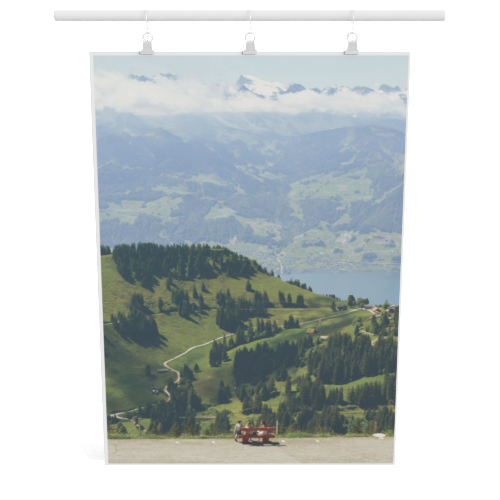

1순위 추천 아이템 : Fabric Poster - Switzerland #1 (50x70)


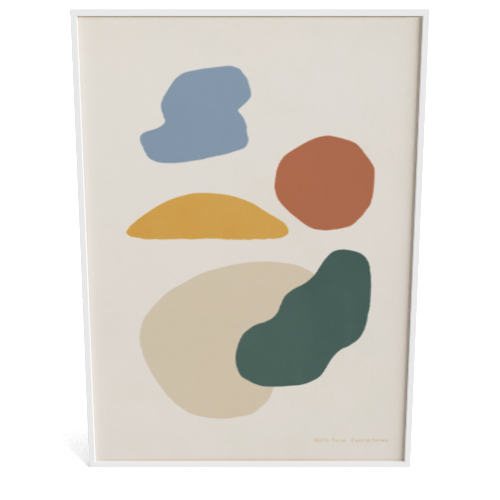

2순위 추천 아이템 : POSTER 1
이미지 없음

3순위 추천 아이템 : Archisketch Latte Cup


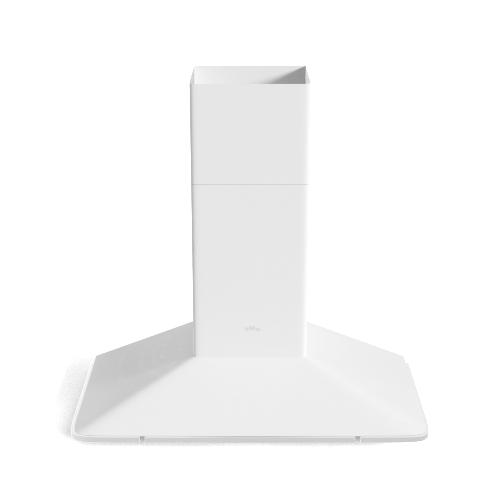

4순위 추천 아이템 : 침니형 화이트 후드 로빈 RNH-90(화이트)


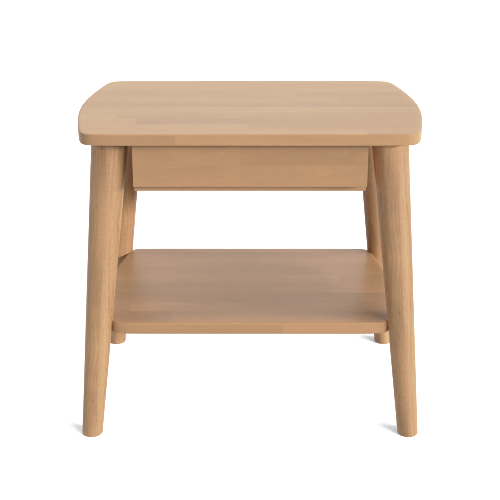

5순위 추천 아이템 : 헤디 고무나무 원목 협탁 2colors (내추럴)


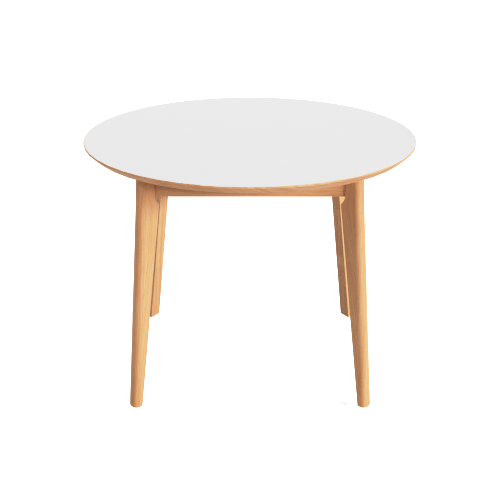

6순위 추천 아이템 : 오크원형테이블(1000) (화이트오크)


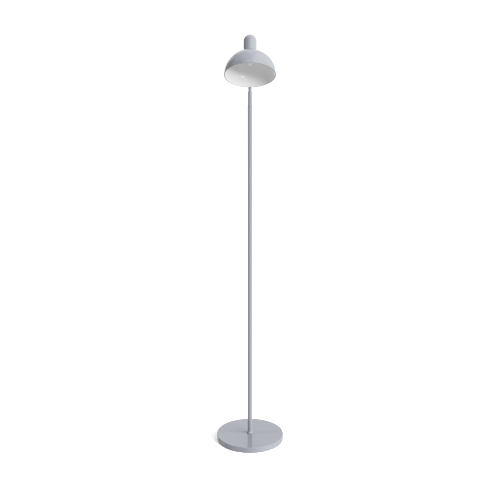

7순위 추천 아이템 : 데일리라잇 장스탠드 7colors (그레이)


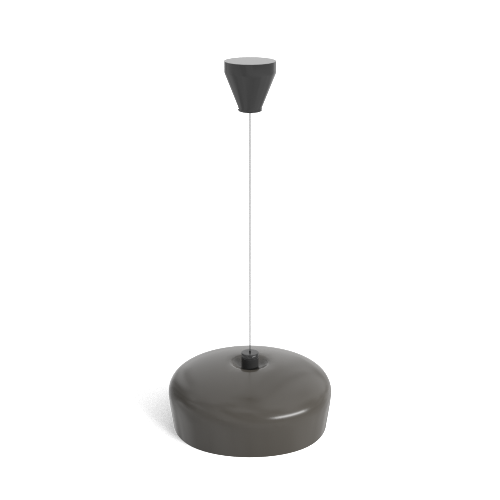

8순위 추천 아이템 : 러블430 펜던트 (블랙)


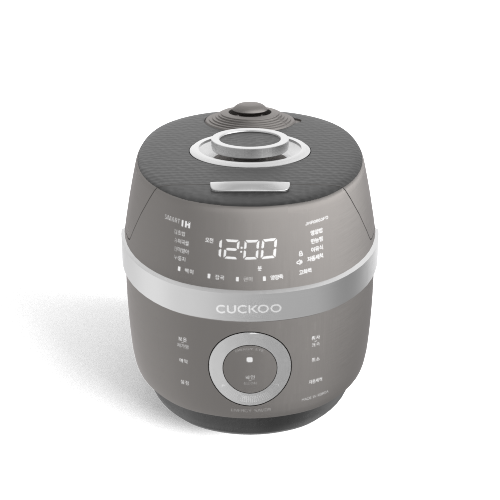

9순위 추천 아이템 : 6인용 IH압력밥솥 CRP-JHR0660FD (그레이)


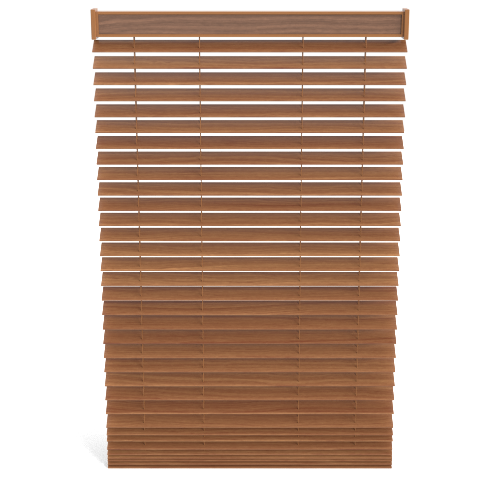

10순위 추천 아이템 : PREMIUM 맞춤 우드 블라인드 브라운


In [64]:
show_rec_items(search_userId, recomm_items_b_df)

In [57]:
# 선택된 유저가 이미 가지고 있는 기존 아이템 이미지 보여주기
def show_user_list(search_userId):
    for name, images in products_df[products_df['projectId'] == search_userId][['name', 'images']].values.tolist():
        try:
            res = requests.get(images[0])
            img = Image.open(BytesIO(res.content))
            display(img)
        except:
            pass
        print(name)

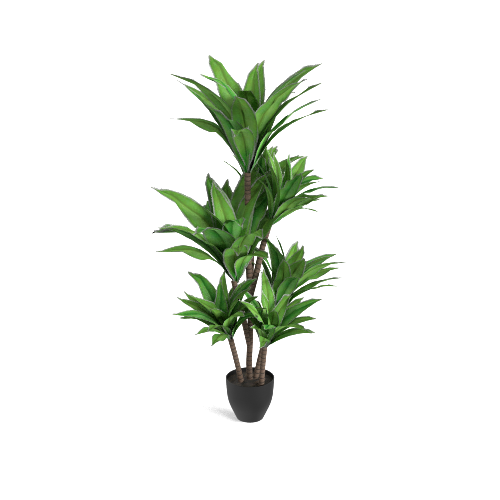

콤펙타 조화나무 (내추럴)


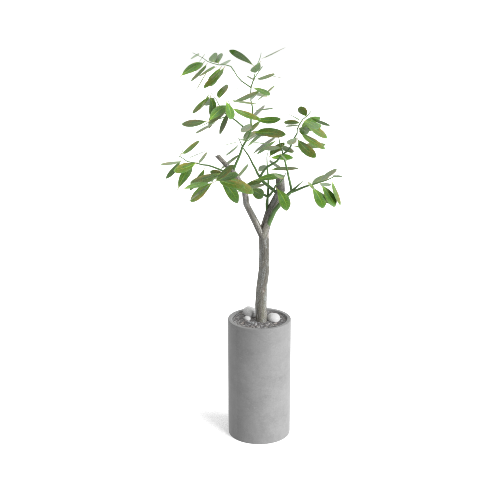

대형 뱅갈 고무나무 - 원형 테라조 화분2colors (원형 그레이)


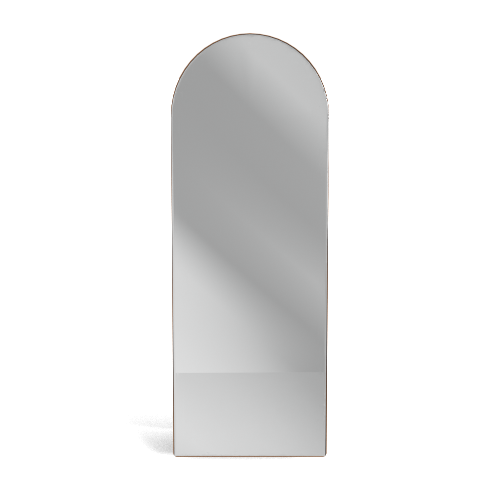

엘리 전신거울 (600) (오크)


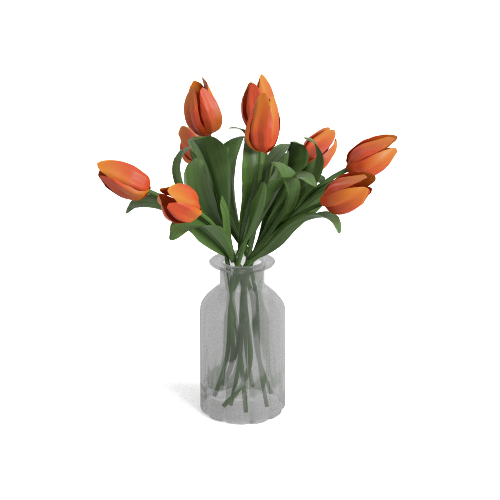

튤립 조화(10P) 화병 세트 망고


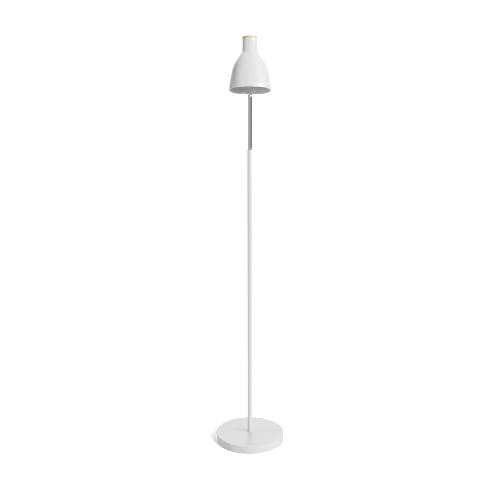

라온 장스탠드 2colors (화이트)


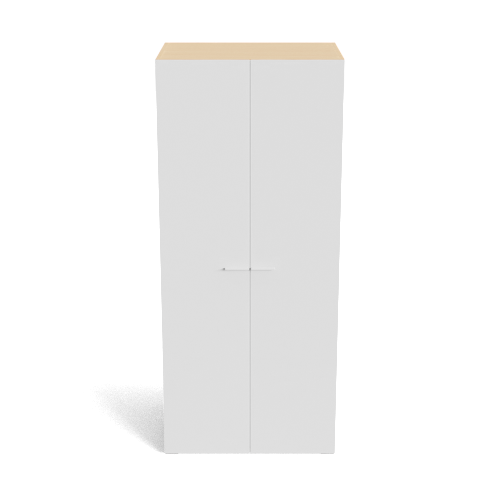

심포니 800 수납 옷장/장롱 (메이플&화이트)


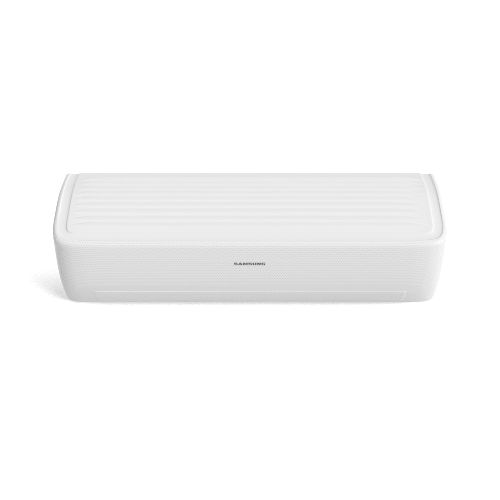

무풍에어컨 AR07R5173HC


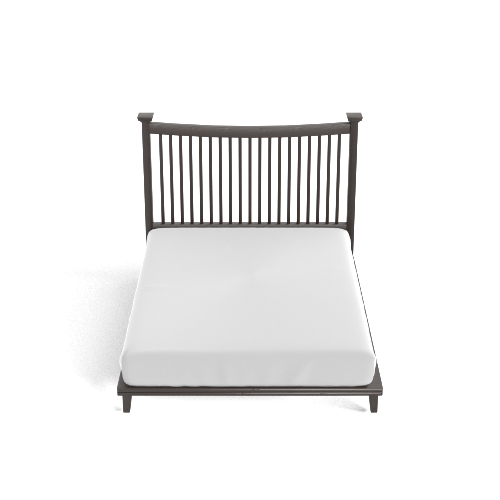

라움 세븐트리 원목침대 Q/K (월넛)


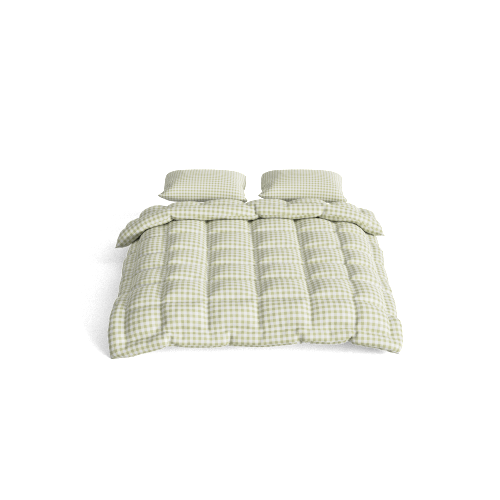

디저트 프리미엄 차렵이불(Q 이불베개세트) 10colors (버진올리브)


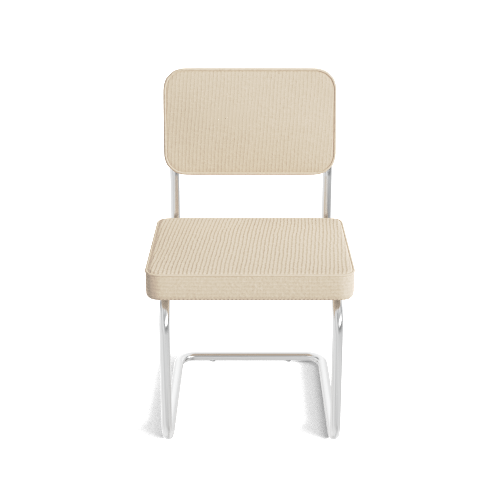

코듀로이 세스카체어 아이보리


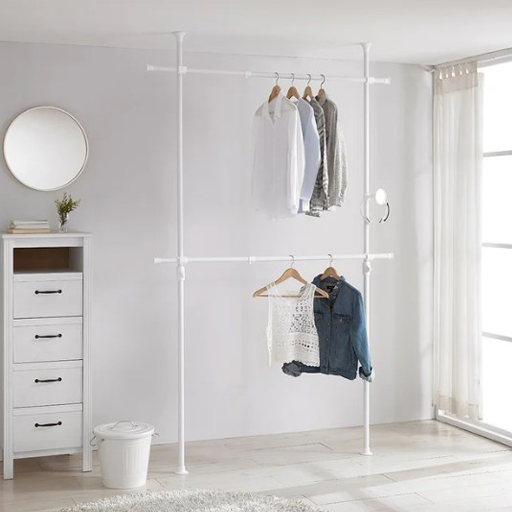

왕자 네오스페이스 고정형 행거 (베이직2단) (화이트)


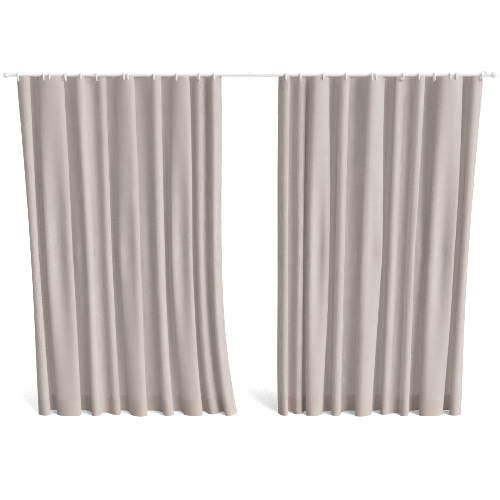

내츄럴 베이지 린넨스타일 암막커튼


In [58]:
show_user_list(search_userId)